In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import healpy as hp

import lsst.sims.maf.db as db
import lsst.sims.maf.utils as utils
import lsst.sims.maf.metrics as metrics
import lsst.sims.maf.slicers as slicers
import lsst.sims.maf.stackers as stackers
import lsst.sims.maf.metricBundles as metricBundles

In [2]:
# DB files available at http://astro-lsst-01.astro.washington.edu:8082/
dbFile = 'baseline_v1.4_10yrs.db'
# This connection checks which version it thinks the database is and should do the right thing schema-wise
conn = db.OpsimDatabase(dbFile)
outDir='temp'
resultsDb = db.ResultsDb(outDir=outDir)

Healpix slicer using NSIDE=128, approximate resolution 27.483891 arcminutes
Querying database SummaryAllProps with constraint filter="r" and note="DD:ELAISS1" for columns ['fiveSigmaDepth', 'fieldDec', 'fieldRA']
Found 8261 visits
Running:  ['opsim_CoaddM5_r_and_noteDD_ELAISS1_HEAL']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
Plotting figures with "filter="r" and note="DD:ELAISS1"" constraint now.
monopole: -2724.54  dipole: lon: 9.5278, lat: -44.0101, amp: 2753.96
Plotting complete.


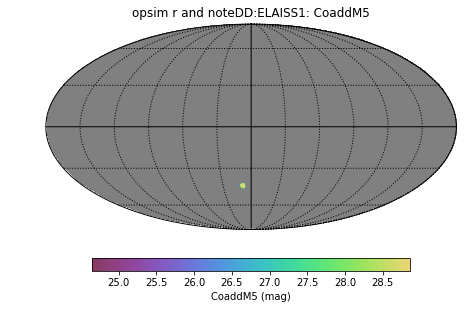

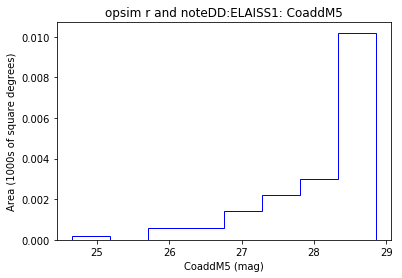

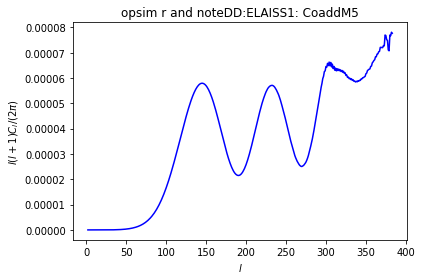

In [5]:
# Example 1, use the SQL query to grab only observations noted as a given ddf
# common options include:  DD:290, DD:ELAISS1, DD:ECDFS, DD:XMM-LSS, DD:COSMOS
# sometimes the u-band is done independently, and they have the format like: DD:u,COSMOS
bundleList = []
sql = 'filter="r" and note="DD:ELAISS1"'
metric = metrics.Coaddm5Metric()
slicer = slicers.HealpixSlicer()
plotDict = {}
bundleList.append(metricBundles.MetricBundle(metric,slicer,sql, plotDict=plotDict))
bd = metricBundles.makeBundlesDictFromList(bundleList)
bg = metricBundles.MetricBundleGroup(bd, conn, outDir=outDir, resultsDb=resultsDb)
bg.runAll()
bg.plotAll(closefigs=False)

Querying database SummaryAllProps with constraint filter="r" for columns ['fiveSigmaDepth', 'fieldDec', 'fieldRA']
Found 474955 visits
Running:  ['opsim_CoaddM5_r_USER']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
Plotting figures with "filter="r"" constraint now.
Plotting complete.


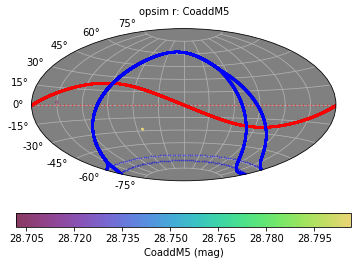

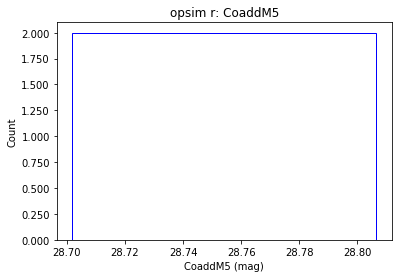

In [10]:
# Another way, use the userpoint slicer to just check the point at the center of a DDF
# Here's the utility function that generates the DDF surveys, and thus includes the coordinates we're using
# https://github.com/lsst/sims_featureScheduler/blob/master/python/lsst/sims/featureScheduler/surveys/dd_surveys.py

# Note, this is probably better, because it will include regular survey observations that happen to overlap the DDF as well.

# Extended Chandra Deep Field South
RA = [53.125]
dec = [-28.-6/60.]

# COSMOS
RA.append(150.1)
dec.append(2.+10./60.+55/3600.)

bundleList = []
sql = 'filter="r"'
metric = metrics.Coaddm5Metric()
# Now measure things at just specific points rather than full sky
slicer = slicers.UserPointsSlicer(RA, dec)
plotDict = {}
bundleList.append(metricBundles.MetricBundle(metric,slicer,sql, plotDict=plotDict))
bd = metricBundles.makeBundlesDictFromList(bundleList)
bg = metricBundles.MetricBundleGroup(bd, conn, outDir=outDir, resultsDb=resultsDb)
bg.runAll()
bg.plotAll(closefigs=False)

In [11]:
# Can see what we got
bundleList[0].metricValues

masked_array(data=[28.80650512391088, 28.70182776636732],
             mask=[False, False],
       fill_value=-666.0)